## Adapted from Kaggle notebooks
+ [Dataset](https://data.cnra.ca.gov/dataset/cal-fire-damage-inspection-dins-data)
+ [Data Visualization](https://www.kaggle.com/code/vijayveersingh/1-data-visualization-california-wildfire-data)

In [1]:
import numpy as np
import pandas as pd

# pandas w/ support for geojson files
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

import contextily as ctx

import dateparser

import plotly.express as px

In [2]:
# Load GeoJSON file
geo_data = gpd.read_file('data/structure_data.geojson')

geo_data.head(5)


OBJECTID           DAMAGE  STREETNUMBER     STREETNAME STREETTYPE  \
0         1        No Damage        8376.0   Quail Canyon       Road   
1         2  Affected (1-9%)        8402.0   Quail Canyon       Road   
2         3        No Damage        8430.0  Quail Canyon        Road   
3         4        No Damage        3838.0    Putah Creek       Road   
4         5        No Damage        3830.0    Putah Creek       Road   

  STREETSUFFIX     CITY STATE  ZIPCODE CALFIREUNIT  ... FIRENAME         APN  \
0         None  Winters    CA      NaN         LNU  ...    Quail  0101090290   
1         None  Winters    CA      NaN         LNU  ...    Quail  0101090270   
2         None  Winters    CA      NaN         LNU  ...    Quail  0101090310   
3         None  Winters    CA      NaN         LNU  ...    Quail  0103010240   
4         None  Winters    CA      NaN         LNU  ...    Quail  0103010220   

  ASSESSEDIMPROVEDVALUE YEARBUILT                              SITEADDRESS  \
0              510000.0    1997.0  8376 QUAIL CANYON RD VACAVILLE CA 95688   
1              573052.0    1980.0  8402 QUAIL CANYON RD VACAVILLE CA 95688   
2              350151.0    2004.0  8430 QUAIL CANYON RD VACAVILLE CA 95688   
3              134880.0    1981.0     3838 PUTAH CREEK RD WINTERS CA 95694   
4              346648.0    1980.0     3830 PUTAH CREEK RD WINTERS CA 95694   

                               GLOBALID   Latitude   Longitude  \
0  e1919a06-b4c6-476d-99e5-f0b45b070de8  38.474960 -122.044465   
1  b090eeb6-5b18-421e-9723-af7c9144587c  38.477442 -122.043252   
2  268da70b-753f-46aa-8fb1-327099337395  38.479358 -122.044585   
3  64d4a278-5ee9-414a-8bf4-247c5b5c60f9  38.487313 -122.015115   
4  1b44b214-01fd-4f06-b764-eb42a1ec93d7  38.485636 -122.016122   

  INCIDENTSTARTYEAR                           geometry  
0              2020   POINT (-13585927.697 4646740.75)  
1              2020  POINT (-13585792.707 4647093.599)  
2              2020  POINT (-13585941.007 4647366.034)  
3              2020   POINT (-13582660.52 4648497.399)  
4              2020  POINT (-13582772.601 4648258.826)  

[5 rows x 46 columns]

In [3]:
# parse out incident start year + create new file (~2mins)
# geo_data['INCIDENTSTARTYEAR'] = geo_data.apply(lambda row: dateparser.parse(row['INCIDENTSTARTDATE']).year, axis = 1)
# geo_data.to_file('structure_data.geojson', driver='GeoJSON')

In [4]:
# dataset size
len(geo_data)

130722

In [4]:
# number of entires from 2025
geo_data_2025 = geo_data[geo_data.INCIDENTSTARTYEAR == 2025]
len(geo_data_2025)

30492

In [5]:
# range of structure damage data
print(geo_data.INCIDENTSTARTYEAR.min())
print(geo_data.INCIDENTSTARTYEAR.max())

2013
2025


In [6]:
# dataset attributes
geo_data.columns

Index(['OBJECTID', 'DAMAGE', 'STREETNUMBER', 'STREETNAME', 'STREETTYPE',
       'STREETSUFFIX', 'CITY', 'STATE', 'ZIPCODE', 'CALFIREUNIT', 'COUNTY',
       'COMMUNITY', 'BATTALION', 'INCIDENTNAME', 'INCIDENTNUM',
       'INCIDENTSTARTDATE', 'HAZARDTYPE', 'WHEREFIRESTARTEDONSTRUCTURE',
       'WHATDIDFIRESTARTFROM', 'DEFENSIVEACTIONS', 'STRUCTURETYPE',
       'STRUCTURECATEGORY', 'NUMBEROFUNITPERSTRUCTURE',
       'NOOUTBUILDINGSDAMAGED', 'NOOUTBUILDINGSNOTDAMAGED', 'ROOFCONSTRUCTION',
       'EAVES', 'VENTSCREEN', 'EXTERIORSIDING', 'WINDOWPANE',
       'DECKPORCHONGRADE', 'DECKPORCHELEVATED', 'PATIOCOVERCARPORT',
       'FENCEATTACHEDTOSTRUCTURE', 'PROPANETANKDISTANCE',
       'UTILITYMISCSTRUCTUREDISTANCE', 'FIRENAME', 'APN',
       'ASSESSEDIMPROVEDVALUE', 'YEARBUILT', 'SITEADDRESS', 'GLOBALID',
       'Latitude', 'Longitude', 'INCIDENTSTARTYEAR', 'geometry'],
      dtype='object')

In [7]:
geo_data_2025.head(1)


OBJECTID     DAMAGE  STREETNUMBER  STREETNAME STREETTYPE STREETSUFFIX  \
100230    101222  No Damage        2190.0  Grand Oaks     Avenue     blding B   

            CITY STATE  ZIPCODE CALFIREUNIT  ... FIRENAME         APN  \
100230  Altadena    CA  91001.0         LAC  ...     None  5857023020   

       ASSESSEDIMPROVEDVALUE YEARBUILT  \
100230              405135.0    1949.0   

                                    SITEADDRESS  \
100230  2190 GRAND OAKS AVE, ALTADENA, CA 91001   

                                    GLOBALID   Latitude   Longitude  \
100230  9c878aa1-f6e9-4293-86ab-0052cd254b79  34.183522 -118.102419   

       INCIDENTSTARTYEAR                          geometry  
100230              2025  POINT (-13147101.11 4053471.198)  

[1 rows x 46 columns]

In [15]:
# parllel categories plot

fig = px.parallel_categories(geo_data_2025, dimensions=['INCIDENTNAME', 'CITY', 'DAMAGE', 'STRUCTURETYPE'],
                             title = 'Parllel Categories Plot for 2025 LA Wildfires')


fig.write_html('parallel_cat_plot.html')
fig.show()

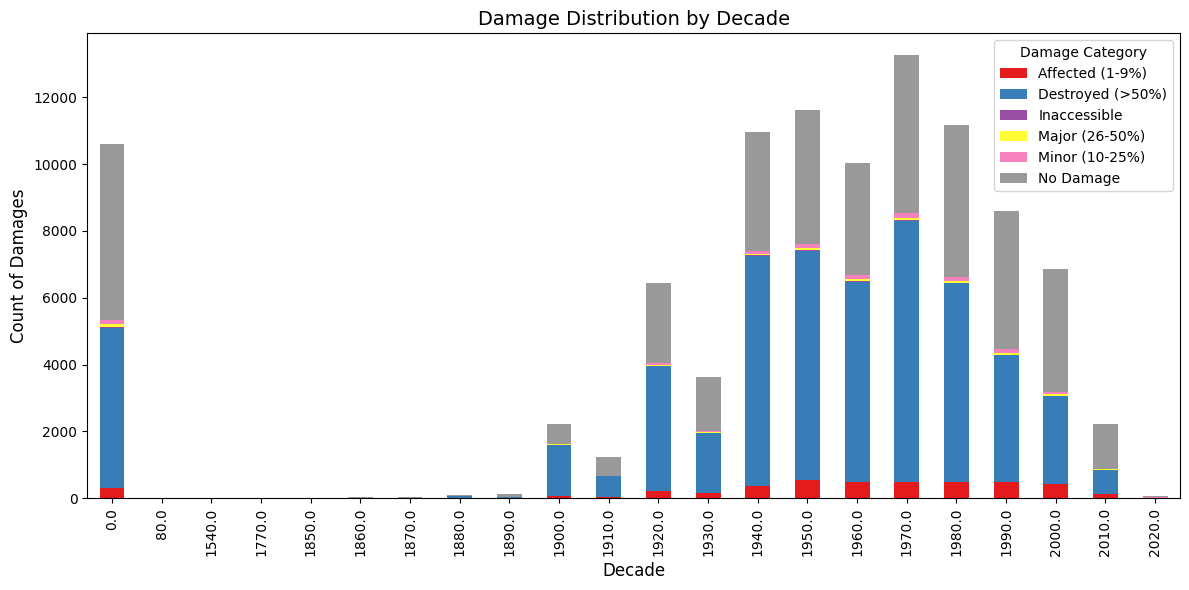

In [36]:
# Create a 'Decade' column by grouping the 'YEARBUILT' into decades
geo_data['Decade'] = (geo_data['YEARBUILT'] // 10) * 10

# Group data by Decade and DAMAGE, count occurrences
damage_by_decade = geo_data.groupby(['Decade', 'DAMAGE']).size().unstack().fillna(0)

# Plot stacked bar plot for damage distribution by Decade with 'Set1' color palette
damage_by_decade.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='Set1')

# Customize plot
plt.title("Damage Distribution by Decade", fontsize=14)
plt.xlabel("Decade", fontsize=12)
plt.ylabel("Count of Damages", fontsize=12)
plt.legend(title="Damage Category", fontsize=10)
plt.tight_layout()
plt.show()

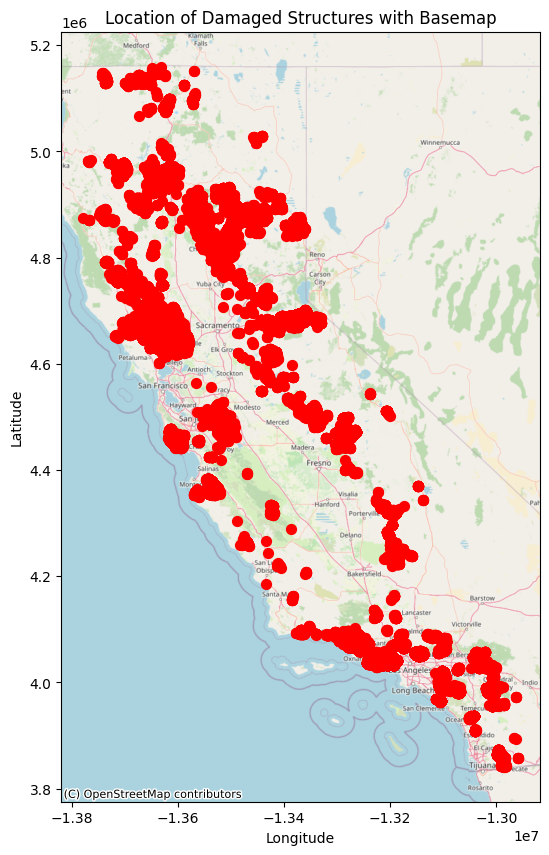

In [37]:
# Ensure the data has a valid projection (e.g., Web Mercator)
geo_data = geo_data.to_crs(epsg=3857)

# Plot the damage points on top of the basemap
fig, ax = plt.subplots(figsize=(10, 10))

# Plot your geospatial data
geo_data.plot(ax=ax, color='red', markersize=50)

# Add OpenStreetMap basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize plot
plt.title("Location of Damaged Structures with Basemap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

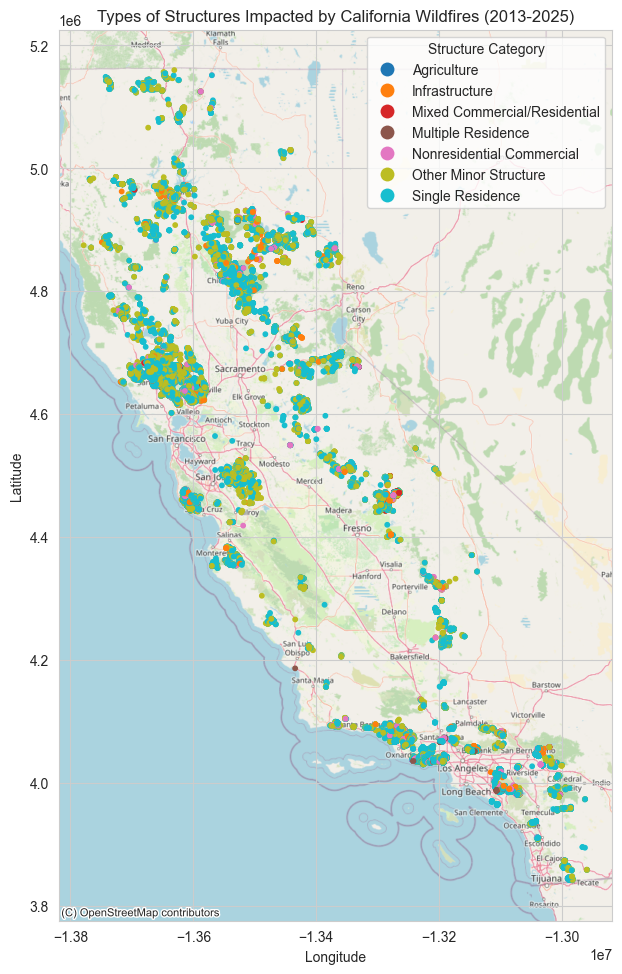

In [84]:
# Ensure the data has a valid projection (e.g., Web Mercator)
geo_data = geo_data.to_crs(epsg=3857)

# Plot the damage points on top of the basemap
fig, ax = plt.subplots(figsize=(10, 10))

# Plot your geospatial data
geo_data.plot(ax=ax, column='STRUCTURECATEGORY', markersize=10, legend=True,
              legend_kwds={'title': 'Structure Category'})

# Add OpenStreetMap basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize plot
plt.title("Types of Structures Impacted by California Wildfires (2013-2025)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()

plt.savefig('wildfire_map_structuretype_all.png')

In [ ]:
import geoplot
import geoplot.crs as gcrs

# Plot heatmap
ax = geoplot.kdeplot(geo_data, projection=gcrs.AlbersEqualArea())

# Add polygons
geoplot.polyplot(geo_data, ax=ax)

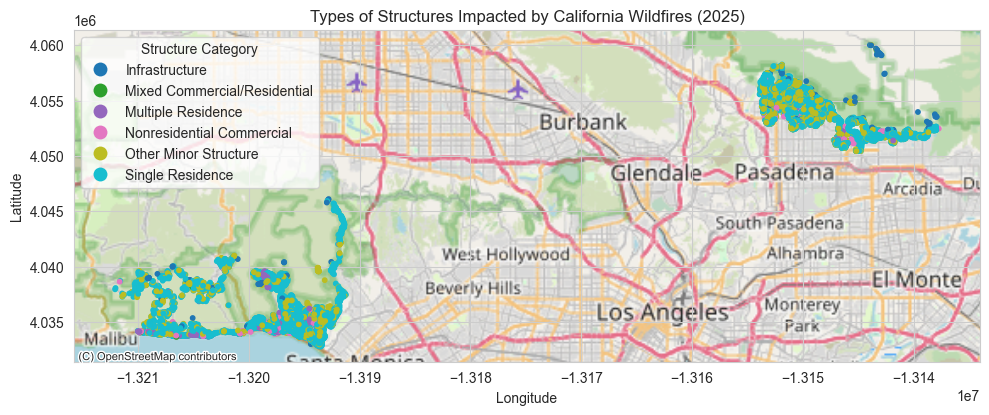

In [85]:
# Ensure the data has a valid projection (e.g., Web Mercator)
geo_data_2025 = geo_data[geo_data.INCIDENTSTARTYEAR == 2025]
geo_data_2025 = geo_data_2025.to_crs(epsg=3857)

# Plot the damage points on top of the basemap
fig, ax = plt.subplots(figsize=(10, 10))

# Plot your geospatial data
geo_data_2025.plot(ax=ax, column='STRUCTURECATEGORY', markersize=10, legend=True,
              legend_kwds={'title': 'Structure Category'})

# Add OpenStreetMap basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize plot
plt.title("Types of Structures Impacted by California Wildfires (2025)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()

plt.savefig('wildfire_map_structuretype_2025.png')

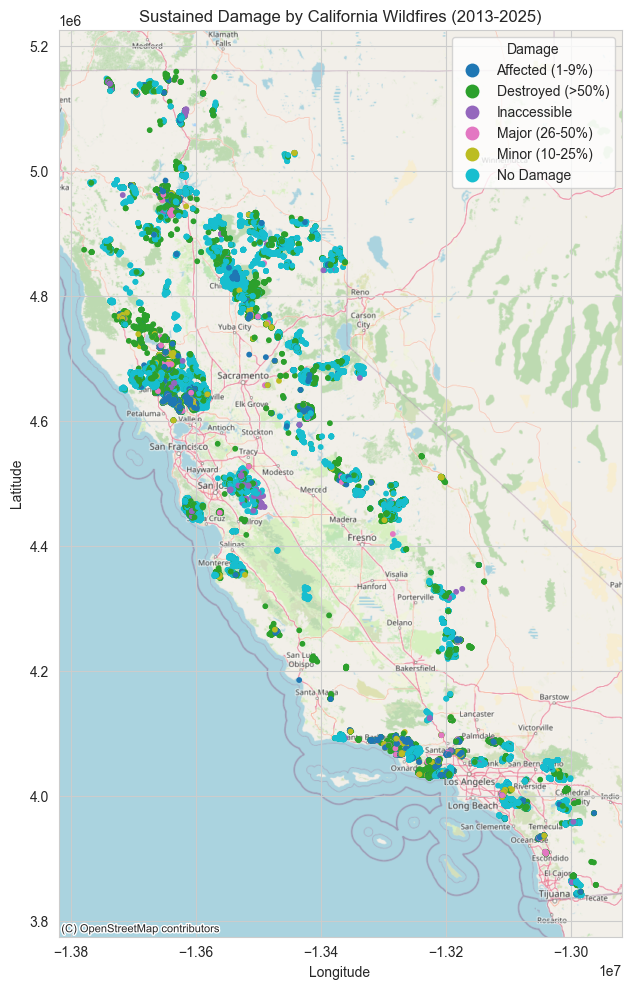

In [86]:
# Ensure the data has a valid projection (e.g., Web Mercator)
geo_data = geo_data.to_crs(epsg=3857)

# Plot the damage points on top of the basemap
fig, ax = plt.subplots(figsize=(10, 10))

# Plot your geospatial data
geo_data.plot(ax=ax, column='DAMAGE', markersize=10, legend=True,
              legend_kwds={'title': 'Damage'})

# Add OpenStreetMap basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize plot
plt.title("Sustained Damage by California Wildfires (2013-2025)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()

plt.savefig('wildfire_map_damage_all.png')

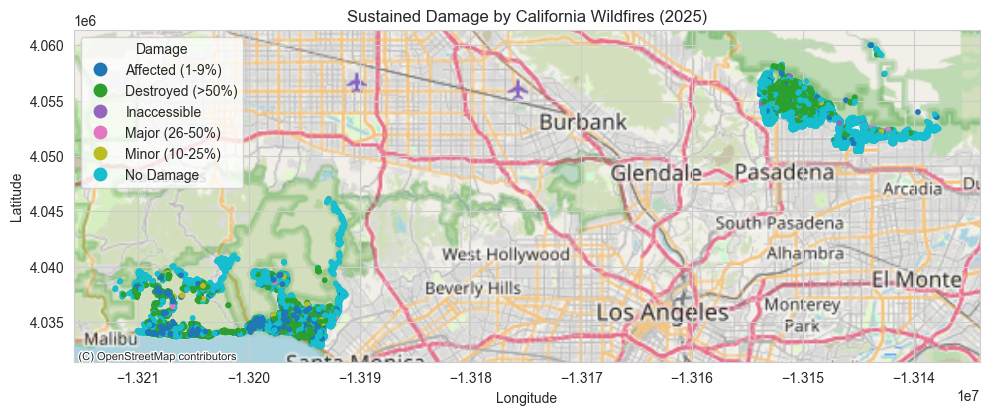

In [88]:
# Ensure the data has a valid projection (e.g., Web Mercator)
geo_data_2025 = geo_data[geo_data.INCIDENTSTARTYEAR == 2025]
geo_data_2025 = geo_data_2025.to_crs(epsg=3857)

# Plot the damage points on top of the basemap
fig, ax = plt.subplots(figsize=(10, 10))

# Plot your geospatial data
geo_data_2025.plot(ax=ax, column='DAMAGE', markersize=10, legend=True,
              legend_kwds={'title': 'Damage'})

# Add OpenStreetMap basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize plot
plt.title("Sustained Damage by California Wildfires (2025)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()

plt.savefig('wildfire_map_damage_all_2025.png')

In [76]:
damage_counts = geo_data.DAMAGE.value_counts()
damage_counts = damage_counts.sort_values()
damage_counts

DAMAGE
Inaccessible          476
Major (26-50%)        705
Minor (10-25%)       1337
Affected (1-9%)      5025
No Damage           53051
Destroyed (>50%)    70128
Name: count, dtype: int64

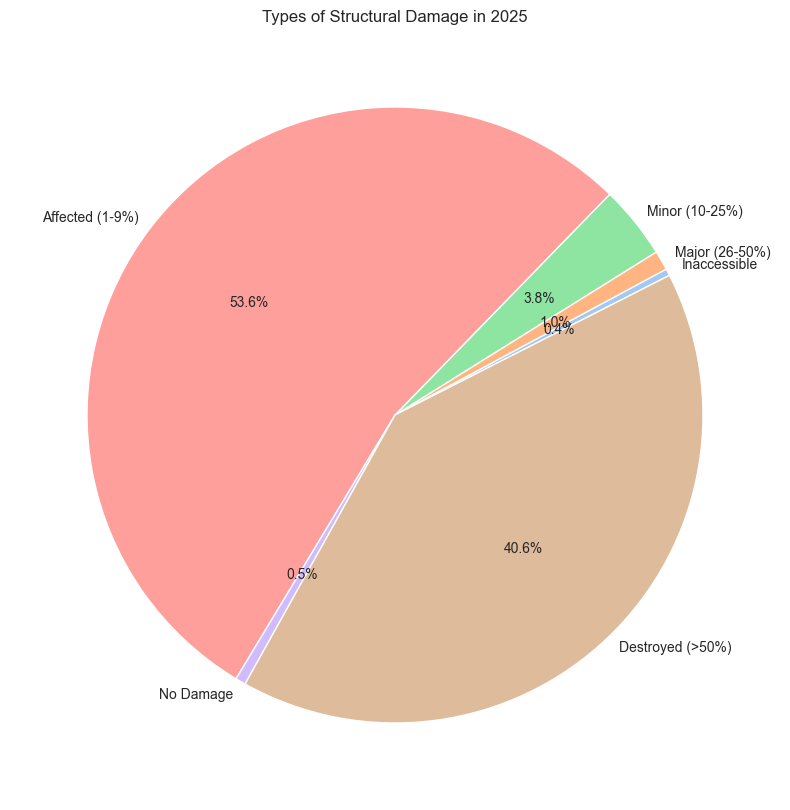

In [80]:
# some random pie chart code to make labels nicer: https://www.nxn.se/p/making-nicer-looking-pie-charts-with-matplotlib
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111)

slices = sorted(damage_counts.to_numpy())
large = slices[:len(slices) // 2]
small = slices[len(slices) // 2:]

reordered = large[::2] + small[::2] + large[1::2] + small[1::2]


angle = 180 + float(sum(small[::2])) / sum(reordered) * 360

colors = sns.color_palette('pastel')[0:6]
pie_wedge_collection = ax.pie(reordered, labels=damage_counts.index, autopct='%1.1f%%', colors=colors, 
                              labeldistance=1.05, startangle=angle)

for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('white')

ax.set_title("Types of Structural Damage in 2025")

plt.show()

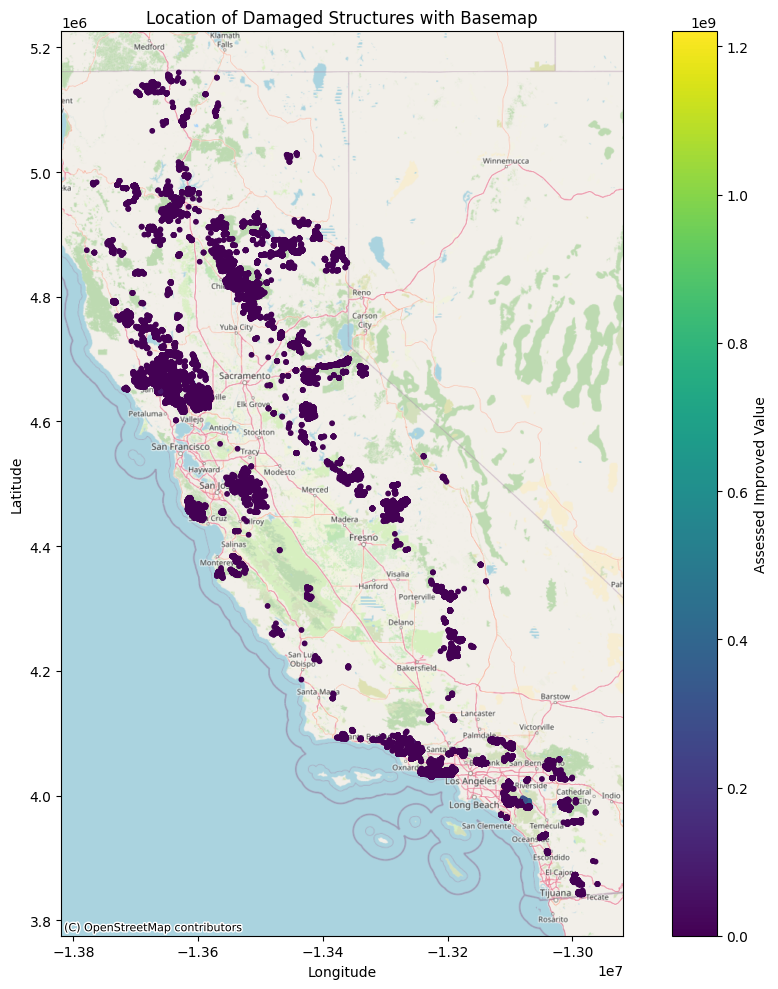

In [40]:
# Ensure the data has a valid projection (e.g., Web Mercator)
geo_data = geo_data.to_crs(epsg=3857)

# Plot the damage points on top of the basemap
fig, ax = plt.subplots(figsize=(10, 10))

# Plot your geospatial data
geo_data.plot(ax=ax, column='ASSESSEDIMPROVEDVALUE', markersize=10, legend=True,
              legend_kwds={'label': 'Assessed Improved Value'})

# Add OpenStreetMap basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize plot
plt.title("Location of Damaged Structures with Basemap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

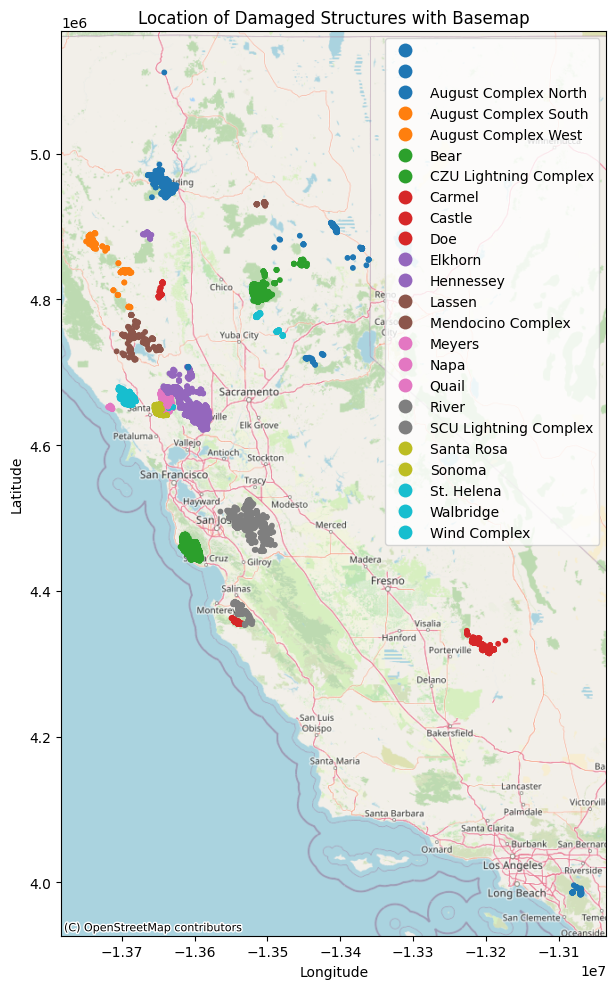

In [41]:
# Ensure the data has a valid projection (e.g., Web Mercator)
geo_data = geo_data.to_crs(epsg=3857)

# Plot the damage points on top of the basemap
fig, ax = plt.subplots(figsize=(10, 10))

# Plot your geospatial data
geo_data.plot(ax=ax, column='FIRENAME', markersize=10, legend=True)

# Add OpenStreetMap basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize plot
plt.title("Location of Damaged Structures with Basemap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

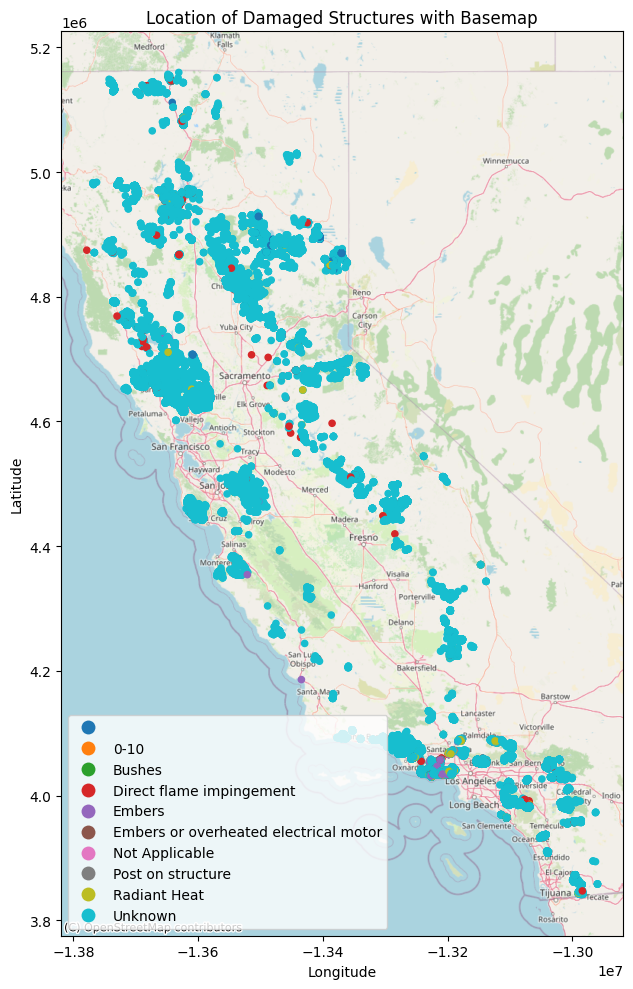

In [42]:
# Ensure the data has a valid projection (e.g., Web Mercator)
geo_data = geo_data.to_crs(epsg=3857)

# Plot the damage points on top of the basemap
fig, ax = plt.subplots(figsize=(10, 10))

geo_data['WHATDIDFIRESTARTFROM'] = geo_data['WHATDIDFIRESTARTFROM'].fillna('Unknown')
# Plot your geospatial data
geo_data.plot(ax=ax, column='WHATDIDFIRESTARTFROM', markersize=20, legend=True)

# Add OpenStreetMap basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize plot
plt.title("Location of Damaged Structures with Basemap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

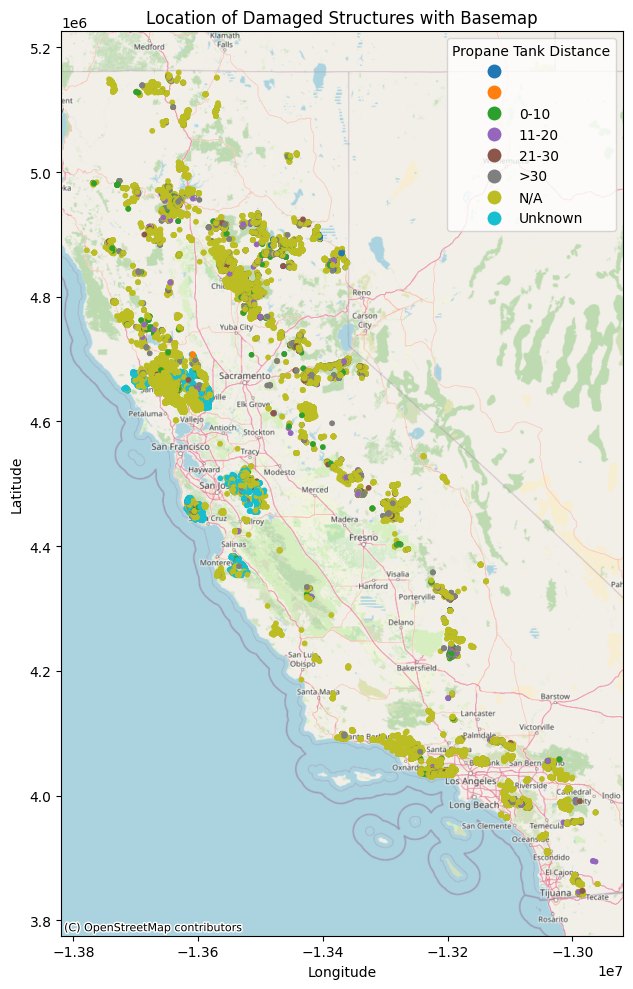

In [43]:
# Ensure the data has a valid projection (e.g., Web Mercator)
geo_data = geo_data.to_crs(epsg=3857)

# Plot the damage points on top of the basemap
fig, ax = plt.subplots(figsize=(10, 10))


geo_data['PROPANETANKDISTANCE'] = geo_data['PROPANETANKDISTANCE'].fillna('N/A')
# Plot your geospatial data
geo_data.plot(ax=ax, column='PROPANETANKDISTANCE', markersize=10, 
              legend=True, 
              legend_kwds={'title':'Propane Tank Distance'})

# Add OpenStreetMap basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize plot
plt.title("Location of Damaged Structures with Basemap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()